 # Preprocesing

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve

In [115]:
stop_words = stopwords.words('spanish')
stop_words.append('https')

In [116]:
def remove_stopWords(text):
    new_text = []

    for txt in text.split(" "):
        if txt not in stop_words and len(txt)>3:
            new_text.append(txt)

    new_text = " ".join(new_text)       

    return new_text

In [117]:
file = '../input/hatespeech/spanish_corpus_6K.txt'

txt = open(file,'r')
txt = txt.read()
txt_split = txt.split('\n')
txt_split = txt_split[:-1]

In [118]:
id_col = []
txt_col = []
hate_col = []
for line in txt_split:
    ln = line.split(';||;')
    try: 
        id_col.append(ln[0])
        txt_col.append(ln[1])
        hate_col.append(ln[2])
    except:
        pass

In [119]:
np.shape(id_col),np.shape(txt_col),np.shape(hate_col)

((6000,), (6000,), (6000,))

In [120]:
df_0 = pd.DataFrame({'id':id_col,'text':txt_col,'length':len_col,'hate':hate_col})

In [121]:
df_0.head()

,id,text,length,hate
0,id=828025263321657348,Ismael es egocentrico porque se vuelve loca si...,131,0
1,id=828025128797741057,..ya tardaba en salir quien pronunciase nombre...,139,0
2,id=828025087815274496,"(Esto no es un discurso político y razonado, o...",131,0
3,id=828025006626058241,"Muy despreciados,siiii,pero todos vestidos de ...",140,1
4,id=828024709761658880,marica explicame porque a veces no te entiendo...,128,1


In [122]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6000 non-null   object
 1   text    6000 non-null   object
 2   length  6000 non-null   int64 
 3   hate    6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [123]:
df_0 = df_0.astype({'hate': 'int64'})
df.dtypes

text      object
length     int64
hate       int64
dtype: object

In [124]:
df_0['hate'].value_counts()

0    4433
1    1567
Name: hate, dtype: int64

In [125]:
file_1 = '../input/dataset1/dft1.csv'

df_1 = pd.read_csv(file_1)

In [126]:
df_1.head()

,text,hate
0,Easyjet quiere duplicar el número de mujeres p...,1
1,El gobierno debe crear un control estricto de ...,1
2,Yo veo a mujeres destruidas por acoso laboral ...,0
3,"— Yo soy respetuoso con los demás, sólamente l...",0
4,Antonio Caballero y como ser de mal gusto e ig...,0


In [127]:
df_1['hate'].value_counts()

0    2909
1    2060
Name: hate, dtype: int64

In [128]:
df_total = pd.concat([df_1,df[['text','hate']]],ignore_index=True)

In [129]:
df_total.tail()

,text,hate
10964,"Sea independentista o constitucionalista, la d...",0
10965,@Bernithedude Llave de gobierno de qué si hay ...,0
10966,@13Pardis @guenhwyvarblack Los carlinos son un...,0
10967,Aplausos en el partido de Colau cuando anuncia...,0
10968,@Rafa_Hernando La Constitución es independenti...,0


In [130]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10969 entries, 0 to 10968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10969 non-null  object
 1   hate    10969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 171.5+ KB


In [131]:
df_total.to_csv('Data_raw.csv',index=False)

In [132]:
df_cleaned = df_total.copy()

In [133]:
# Regex 
html_regex = re.compile(r'<.*?>')
url_regex = re.compile(r"http://\S+|www\.\S+")
special_characters_regex = re.compile(r'[^a-zA-Z ]')
emojic_regex= re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

df_cleaned['text'] = df_cleaned['text'].apply(lambda text: text.lower()) 
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: url_regex.sub(r' ',text)) 
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: html_regex.sub(r' ',text))        
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: emojic_regex.sub(r' ',text))         
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: special_characters_regex.sub(r' ',text))
df_cleaned['text'] = df_cleaned['text'].apply(lambda text: remove_stopWords(text))

In [134]:
df_cleaned.to_csv('Data_cleaned1.csv',index=False)

In [135]:
df_cleaned.head()

,text,hate
0,easyjet quiere duplicar mero mujeres piloto ap...,1
1,gobierno debe crear control estricto inmigraci...,1
2,mujeres destruidas acoso laboral callejero dep...,0
3,respetuoso lamente recuerdo escoria culpa clar...,0
4,antonio caballero gusto ignorante claro mismo ...,0


In [136]:
df_cleaned['hate'].value_counts()

0    7342
1    3627
Name: hate, dtype: int64

# EDA

In [137]:
# Visualización 

def plot_word_cloud(corpus,figsize=(20,20)):
    plt.figure(figsize=figsize)
    
    word_cloud = WordCloud(width=1100,height=600,max_words=300,min_font_size=5)
    return word_cloud.generate(" ".join(corpus))

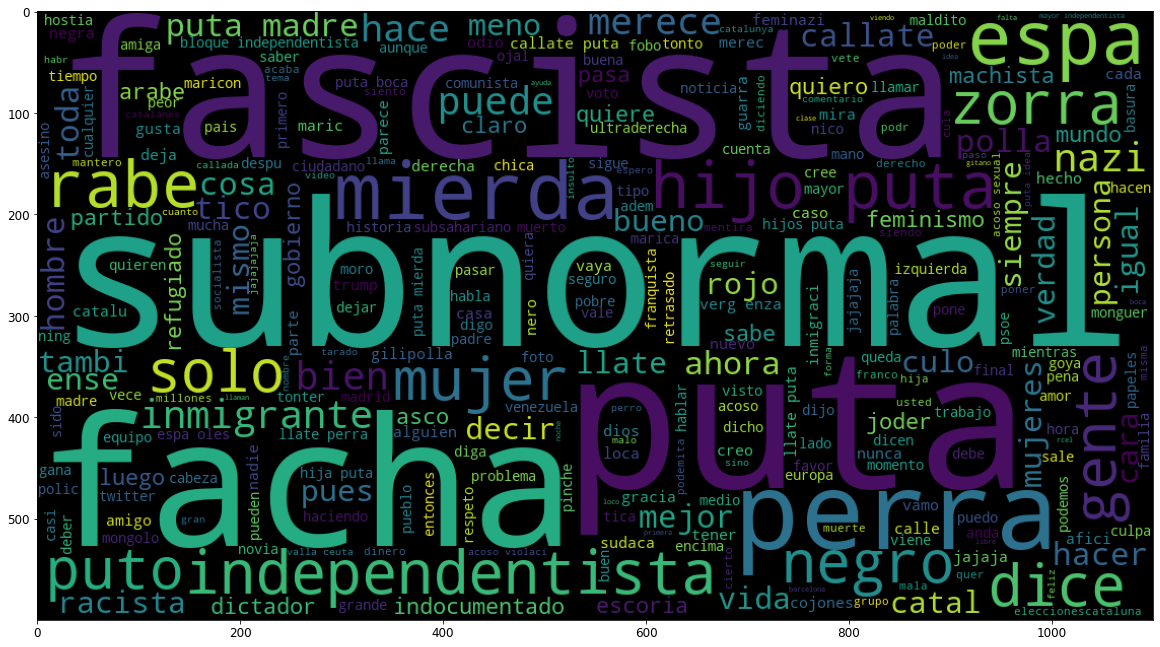

In [138]:
plt.imshow(plot_word_cloud(df_cleaned['text']))